Data Set Kaggle link: https://www.kaggle.com/datasets/craigchilvers/opioids-vssr-provisional-drug-overdose-statistics

Data set: Opioids in the US: VSRR Drug Overdose statistics after cleaning (https://www.kaggle.com/code/craigchilvers/opioids-in-the-us-initial-data-cleaning)

Columns of interest: Year, Data Value is the Number of Deaths Due to Opioid Overdose and the State Name

Problem Statement: Which states have the highest rates of Opioid Deaths due to Overdose in the United States and what is the trend of deaths from 2015 to 2021

In [1]:
import pathlib, os             #for navigating through files and working with file paths
from pathlib import Path
import nltk                    #Natural Language Toolkit - large package for text analysis and natural language processing
import spacy                   # more NLP

import pandas as pd            #for working with dataframes
import numpy as np             # for working with arrays of numbers (single dimension: array; 2d: matrix; 3+d: tensor)
import matplotlib              #these 2 lines of code: importing Python libraries for visualization
import matplotlib.pyplot as plt, seaborn as sns

In [2]:
df_path = Path("../data/Clean_Opioids-in-the-us-data.csv")
df = pd.read_csv(df_path)
df

,Date_parsed,State,Year,Month,Data Value,State Name
0,2015-04-01,AK,2015,April,126.0,Alaska
1,2015-08-01,AK,2015,August,124.0,Alaska
2,2015-12-01,AK,2015,December,121.0,Alaska
3,2015-02-01,AK,2015,February,127.0,Alaska
4,2015-01-01,AK,2015,January,126.0,Alaska
...,...,...,...,...,...,...
3970,2020-10-01,YC,2020,October,2039.0,New York City
3971,2020-09-01,YC,2020,September,1989.0,New York City
3972,2021-02-01,YC,2021,February,2210.0,New York City
3973,2021-01-01,YC,2021,January,2203.0,New York City


In this data we have some rows that have values that are not states, we are dropping them to start with the visualization

In [3]:
#df['State Name'].describe()
#df['State Name'].unique()

#values that are not states
values = ['District of Columbia', 'United States', 'Virginia']

#drop rows that contain any value in the list
df = df[df['State Name'].isin(values) == False]

len(df['State Name'].unique())

50

<Axes: xlabel='Year', ylabel='Data Value'>

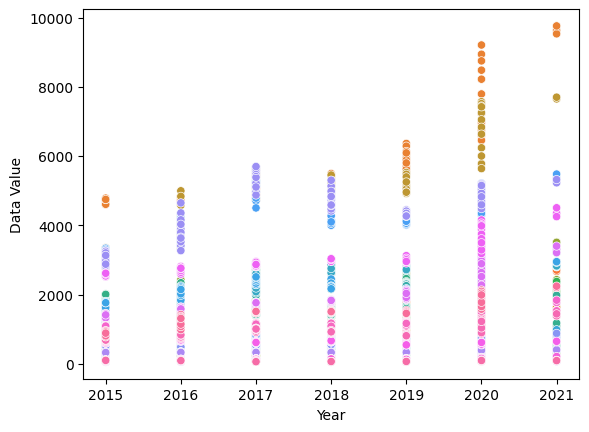

In [4]:
sns.scatterplot(df, x = "Year", y="Data Value", hue = "State Name", legend= None)

We can see from the scatter plot that the division with points is not very clear and another factor might influence the Opiod Death Data Value

<Axes: xlabel='Year', ylabel='Data Value'>

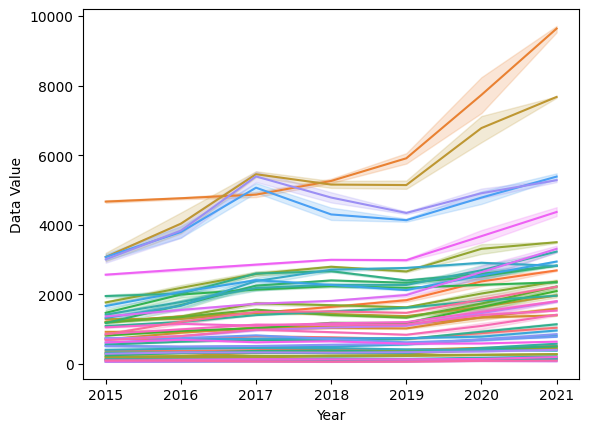

In [5]:
sns.lineplot(df, x = 'Year', y = 'Data Value', hue='State', legend = None)

From the below horizontal bar graph we can see that states such as California, Florida, New York and Pennsylvania have the highest deaths due to Opioid Overdose

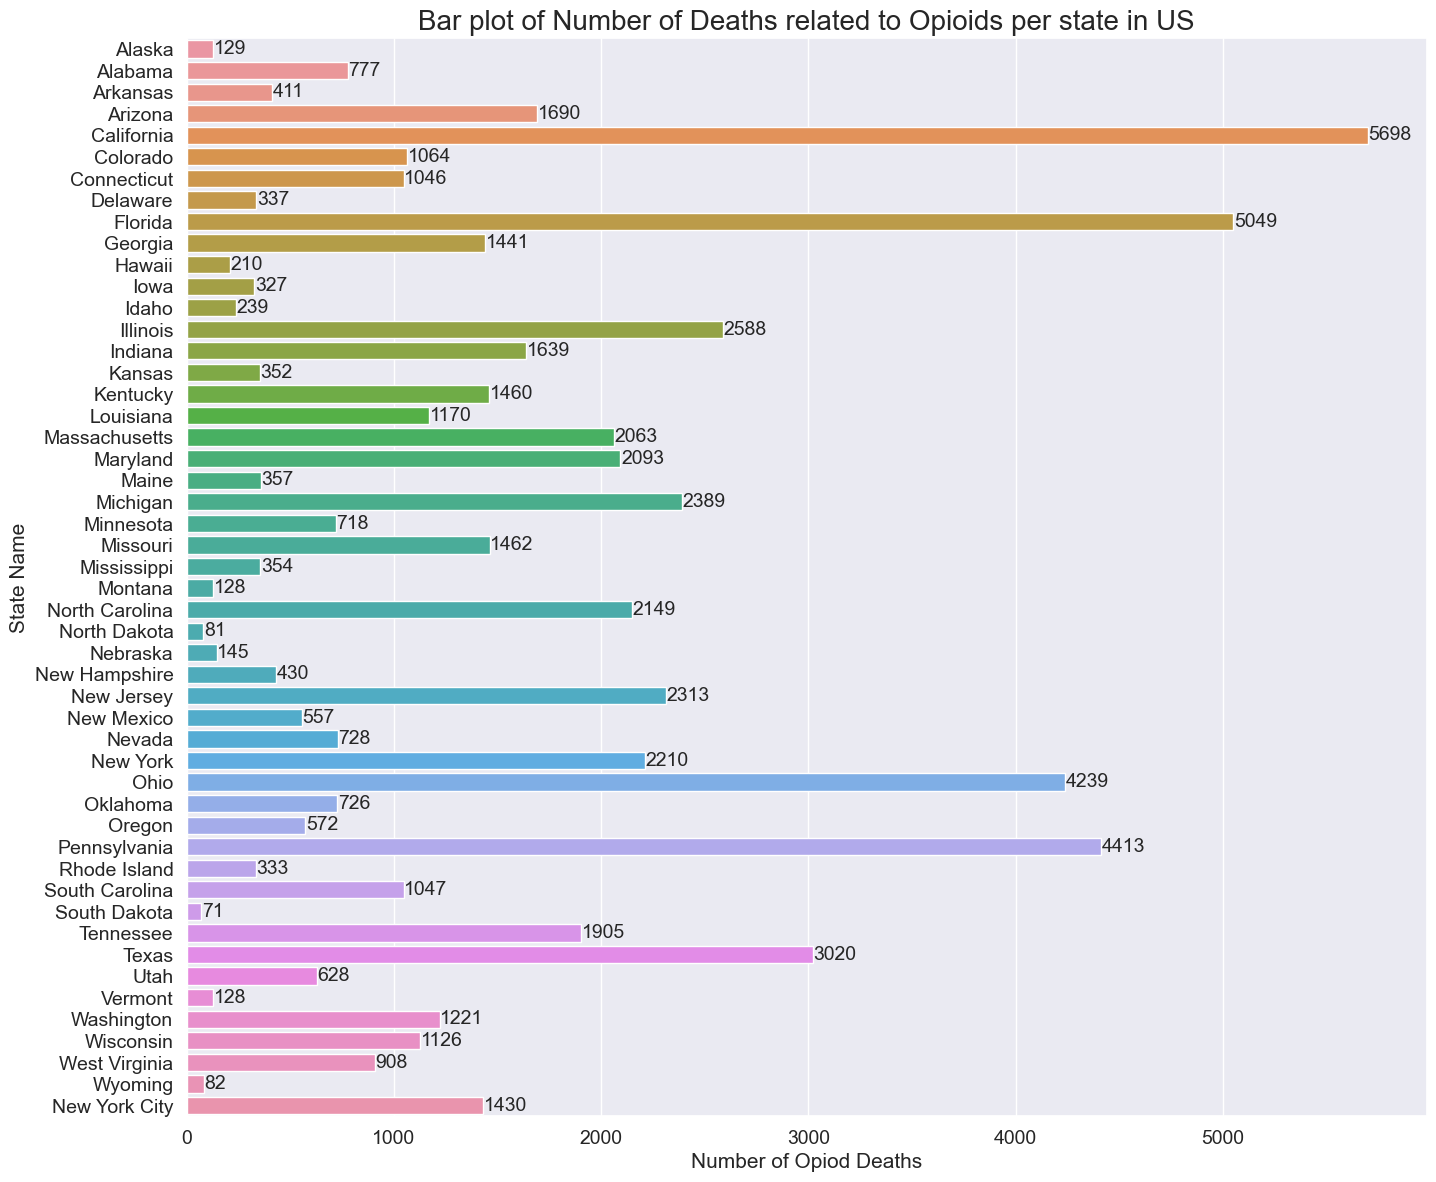

In [6]:
# plot horizontal barplot
sns.set(rc={'figure.figsize':(16,14)})
ax = sns.barplot(x='Data Value', y='State Name', data=df, orient='h', errorbar=None)
ax.set(title='Average number of Deaths per year in US') # title barplot
# label each bar in barplot
for p in ax.patches:
 height = p.get_height() # height of each horizontal bar is the same
 width = p.get_width() # width (average number of passengers)
 # adding text to each bar
 ax.text(x = width+3, # x-coordinate position of data label, padded 3 to right of bar
 y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
 s = '{:.0f}'.format(width), # data label, formatted to ignore decimals
 va = 'center', fontsize = 14) # sets vertical alignment (va) to center
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Number of Opiod Deaths", fontsize = 15)
plt.ylabel("State Name", fontsize = 15)
plt.title("Bar plot of Number of Deaths related to Opioids per state in US", fontsize = 20);

From this line graph, we can study that certain states have high deaths from opioid usage through out the years and have only increased. We can now count deaths across all the years and plot which states have high opioid deaths

In [7]:
#total_count_table = df[['State Name', 'Data Value']].groupby('State Name').agg('sum')
#total_count_table

With the bar and line graphs, we see the trend of deaths from the year 2015 to 2021. The number of deaths has increased steadily and rapidly as the years passed.

<Figure size 800x500 with 0 Axes>

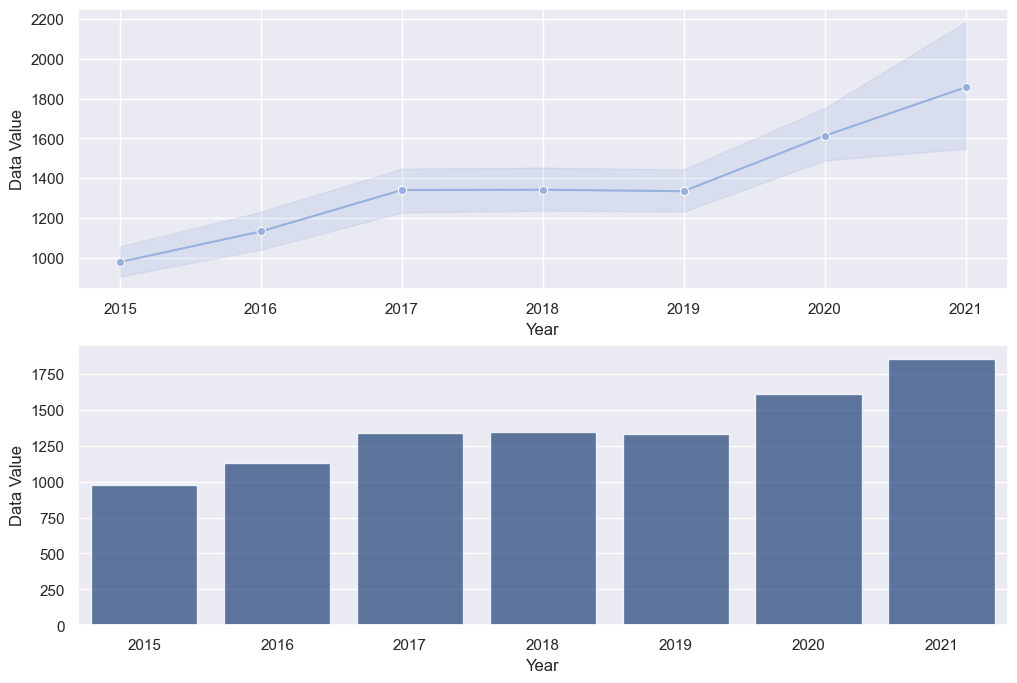

In [8]:
plt.figure(figsize=(8,5))

fig, ax = plt.subplots(2,figsize=(12,8), sharex=False)
l = sns.lineplot(x='Year', 
         y='Data Value',
         data = df, 
         ax=ax[0], 
         color='#97b0df',
         marker='o',
         sort = False,)

b =sns.barplot(x='Year',
        y='Data Value', 
        data = df, 
        ax=ax[1],
        alpha=0.8,
        color='#2c5494', errorbar=None)


This is a histogram i.e frequency of deaths in each state. This depicts the frequency of the number of deaths in each state. California and florida have high opioid deaths

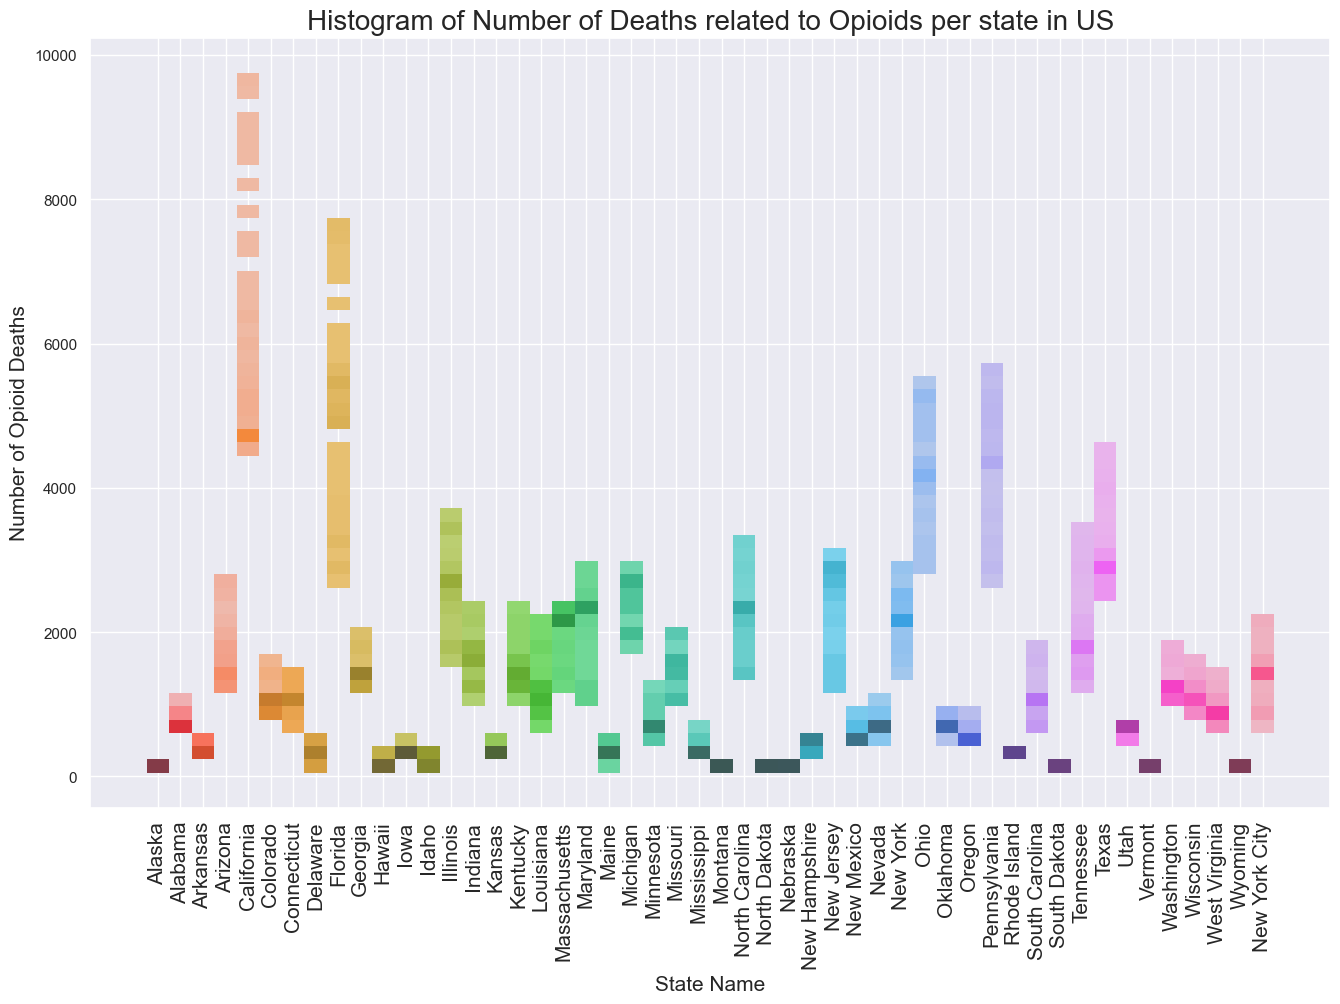

In [9]:
plt.figure(figsize=(16,10))
sns.histplot(df, x = 'State Name', y = 'Data Value', hue = 'State Name', legend=None)
plt.xticks(rotation=90, fontsize = 15)
plt.xlabel("State Name", fontsize = 15)
plt.ylabel("Number of Opioid Deaths", fontsize = 15)
plt.title("Histogram of Number of Deaths related to Opioids per state in US", fontsize = 20);